In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../Dataset/store-sales-time-series-forecasting/train.csv')
test = pd.read_csv('../Dataset/store-sales-time-series-forecasting/test.csv')
store = pd.read_csv('../Dataset/store-sales-time-series-forecasting/stores.csv')
oil = pd.read_csv('../Dataset/store-sales-time-series-forecasting/oil.csv')
holidays_events = pd.read_csv('../Dataset/store-sales-time-series-forecasting/holidays_events.csv')
transaction = pd.read_csv('../Dataset/store-sales-time-series-forecasting/transactions.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [4]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [5]:
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [6]:
store

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [7]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [8]:
holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [9]:
transaction

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [6]:
# 商品ジャンルの一覧を出す
train["family"].value_counts()

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

In [9]:
# 各商品がどれくらい売り上げるのか
pd.options.display.float_format = '{:.2f}'.format
print("Sales amount: " + str(train["sales"].sum()))
train[["family", "sales"]].groupby("family").sum().sort_values("sales", ascending=False)

Sales amount: 1073644952.2030689


,sales
family,
GROCERY I,343462734.89
BEVERAGES,216954486.00
PRODUCE,122704684.68
CLEANING,97521289.00
DAIRY,64487709.00
BREAD/BAKERY,42133945.58
POULTRY,31876004.47
MEATS,31086468.40
PERSONAL CARE,24592051.00


In [10]:
oil["date"] = pd.to_datetime(oil["date"])

date_range = pd.date_range(start='1/1/2013', end='8/31/2017', freq='D')
date_range = pd.DataFrame(date_range, columns=["date"])
oil = date_range.merge(oil, on="date", how="left")

In [11]:
# 2013年～2017年の各月ごとの売り上げ推移をみる
train_info = train[["date", "family", "sales"]]
train_info["date"] = pd.to_datetime(train_info["date"])
train_info["date_monthly"] = train_info['date'].dt.strftime('%Y-%m')
# train_info = train_info.set_index("date")
# train_info.resample("M").sum()
sales_family_monthly = pd.pivot_table(train_info, values='sales', index='family', columns='date_monthly', aggfunc='sum', fill_value=0)
sales_family_monthly

C:\Users\seiju\AppData\Local\Temp\ipykernel_40736\3400593323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_info["date"] = pd.to_datetime(train_info["date"])
C:\Users\seiju\AppData\Local\Temp\ipykernel_40736\3400593323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_info["date_monthly"] = train_info['date'].dt.strftime('%Y-%m')


date_monthly,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
family,,,,,,,,,,,,,,,,,,,,,
AUTOMOTIVE,6557.00,7220.00,7635.00,7485.00,9034.00,8311.00,8508.00,8164.00,7029.00,6803.00,...,10778.00,12442.00,11134.00,11936.00,12794.00,13169.00,11818.00,11956.00,12197.00,6020.00
BABY CARE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,452.00,485.00,488.00,441.00,442.00,298.00,279.00,295.00,351.00,143.00
BEAUTY,4019.00,3747.00,3901.00,3670.00,3716.00,3842.00,4780.00,4720.00,3607.00,3753.00,...,10307.00,9596.00,10272.00,8118.00,7051.00,7489.00,9877.00,8800.00,9623.00,5481.00
BEVERAGES,1670653.00,1508254.00,1822220.00,1743121.00,1824123.00,1829106.00,1664465.00,1810927.00,1908153.00,1855355.00,...,5628678.00,6066803.00,6150083.00,5088308.00,6133553.00,5929467.00,5837405.00,5799818.00,6204055.00,2809903.00
BOOKS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1309.00,1027.00,774.00,549.00,472.00,258.00,152.00,60.00,46.00,8.00
BREAD/BAKERY,549778.86,499809.40,594024.80,568623.22,616045.65,607785.69,568490.33,574358.37,615401.43,610595.11,...,854292.55,862895.51,941283.95,845823.21,959907.16,878030.29,948895.65,900139.19,929873.40,436413.77
CELEBRATION,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,20567.00,30438.00,22009.00,20470.00,23348.00,22611.00,22328.00,22352.00,22722.00,10302.00
CLEANING,1448851.00,1302978.00,1505390.00,1421226.00,1486295.00,1483938.00,1420483.00,1462219.00,1435825.00,1414118.00,...,1884280.00,2232180.00,2057668.00,1887332.00,2004633.00,2019408.00,2264336.00,1990494.00,2299087.00,975858.00
DAIRY,523737.00,499873.00,612508.00,559590.00,595657.00,590898.00,576927.00,572921.00,580773.00,584096.00,...,1472571.00,1616687.00,1572252.00,1384714.00,1628448.00,1561745.00,1617789.00,1510696.00,1505515.00,674541.00


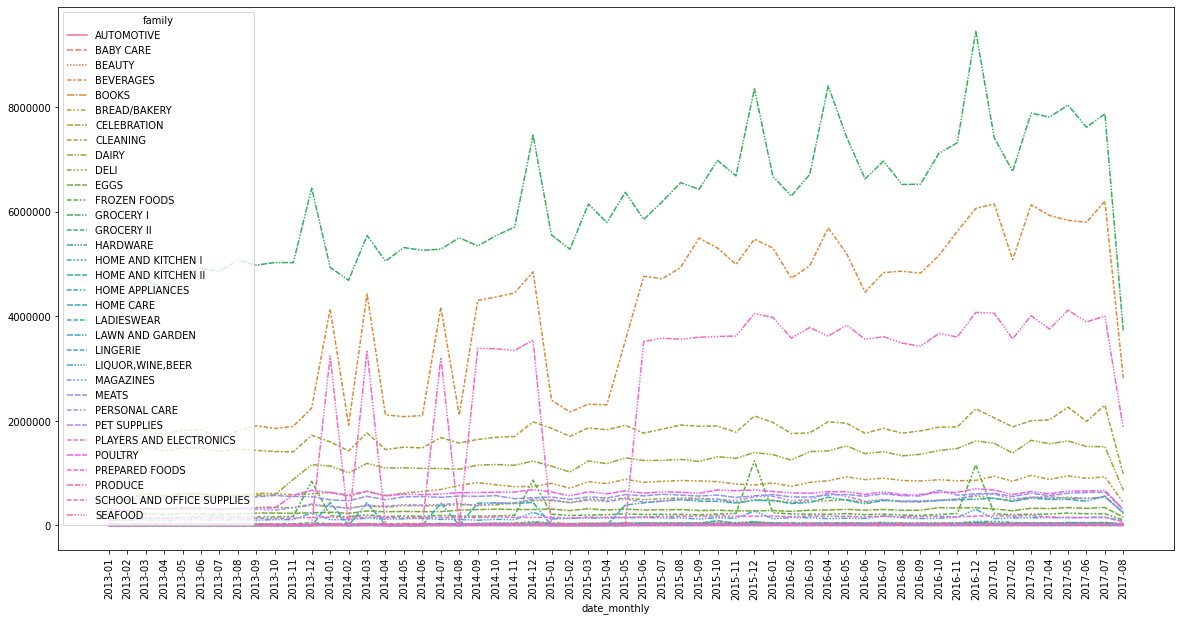

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,10))
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain',axis='y')
# sns.relplot(x='date_monthly', y='family', data=sales_family_monthly, kind='line')
sns.lineplot(data=sales_family_monthly.T)
plt.show()

# 期間は2017年8月15日までなので、8月の売り上げが下がっているように見えるのは妥当である。

In [13]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0
1,1,2013-01-01,1,BABY CARE,0.00,0
2,2,2013-01-01,1,BEAUTY,0.00,0
3,3,2013-01-01,1,BEVERAGES,0.00,0
4,4,2013-01-01,1,BOOKS,0.00,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.13,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.55,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.73,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.00,8


In [12]:
train.describe(include='all')
# train.describe()

,id,date,store_nbr,family,sales,onpromotion
count,3.000888e+06,3000888,3.000888e+06,3000888,3.000888e+06,3.000888e+06
unique,NaN,1684,NaN,33,NaN,NaN
top,NaN,2013-01-01,NaN,AUTOMOTIVE,NaN,NaN
freq,NaN,1782,NaN,90936,NaN,NaN
mean,1.500444e+06,NaN,2.750000e+01,NaN,3.577757e+02,2.602770e+00
std,8.662819e+05,NaN,1.558579e+01,NaN,1.101998e+03,1.221888e+01
min,0.000000e+00,NaN,1.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,7.502218e+05,NaN,1.400000e+01,NaN,0.000000e+00,0.000000e+00
50%,1.500444e+06,NaN,2.750000e+01,NaN,1.100000e+01,0.000000e+00
75%,2.250665e+06,NaN,4.100000e+01,NaN,1.958473e+02,0.000000e+00


In [22]:
train[train['sales'] != 0]

,id,date,store_nbr,family,sales,onpromotion
563,563,2013-01-01,25,BEAUTY,2.000,0
564,564,2013-01-01,25,BEVERAGES,810.000,0
566,566,2013-01-01,25,BREAD/BAKERY,180.589,0
568,568,2013-01-01,25,CLEANING,186.000,0
569,569,2013-01-01,25,DAIRY,143.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [13]:
test.describe(include='all')

,id,date,store_nbr,family,onpromotion
count,2.851200e+04,28512,28512.000000,28512,28512.000000
unique,NaN,16,NaN,33,NaN
top,NaN,2017-08-16,NaN,AUTOMOTIVE,NaN
freq,NaN,1782,NaN,864,NaN
mean,3.015144e+06,NaN,27.500000,NaN,6.965383
std,8.230850e+03,NaN,15.586057,NaN,20.683952
min,3.000888e+06,NaN,1.000000,NaN,0.000000
25%,3.008016e+06,NaN,14.000000,NaN,0.000000
50%,3.015144e+06,NaN,27.500000,NaN,0.000000
75%,3.022271e+06,NaN,41.000000,NaN,6.000000


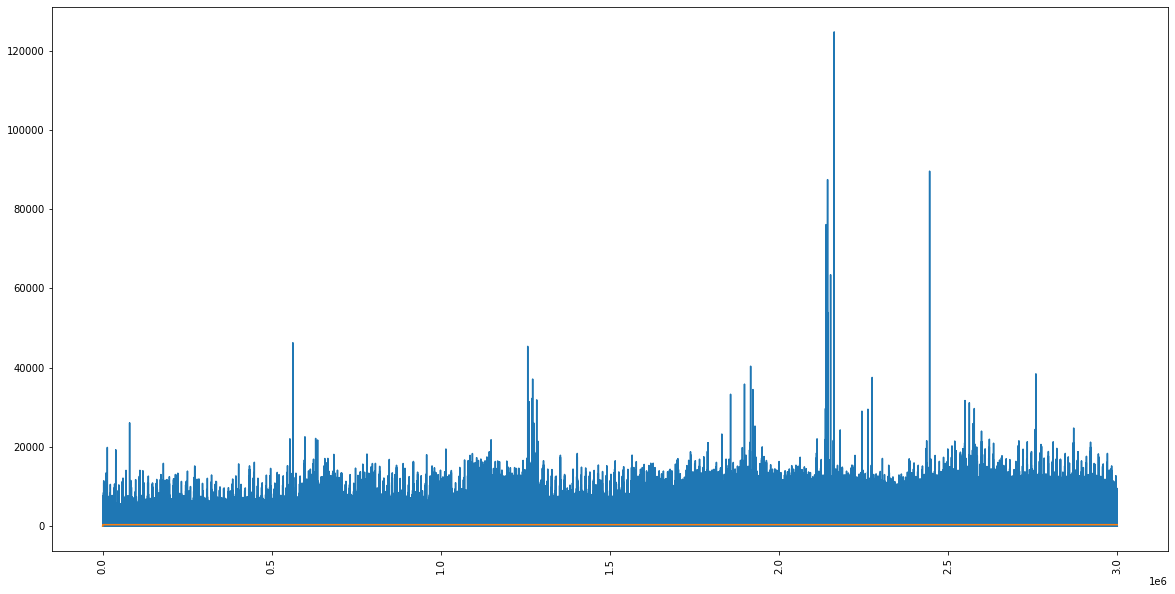

In [19]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xs = train.index.values
ys = train['sales'].values

popt, pcov = curve_fit(func, xs, ys)

a1, b1, c1 = popt
y_reg = a1 * np.exp(-b1 * xs) + c1

plt.figure(figsize = (20,10))
plt.xticks(rotation=90)

plt.plot(train['sales'])
plt.plot(y_reg)